case studies: How does gender influence survival rates?
What age groups had higher survival rates?
What is the age distribution of passengers across classes?
What is the survival rate for each embarkation port (C, Q, S)?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
colours=['#496989'
,'#58A399'
,'#A8CD9F'
,'#E2F4C5']

In [4]:
train_data = pd.read_csv("https://raw.githubusercontent.com/shreshtha11/DataAnalysisinpython/refs/heads/master/train.csv")

In [5]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# first we create a new data frame by removing the unwante coulmns
# 
new_data = train_data.drop(["Pclass","SibSp","Parch","Ticket","Fare","Cabin","PassengerId"],axis=1)

In [7]:
new_data.to_csv('Cleaned_data.csv')

In [8]:
new_data.head(10)

,Survived,Name,Sex,Age,Embarked
0,0,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,1,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,0,"Allen, Mr. William Henry",male,35.0,S
5,0,"Moran, Mr. James",male,NaN,Q
6,0,"McCarthy, Mr. Timothy J",male,54.0,S
7,0,"Palsson, Master. Gosta Leonard",male,2.0,S
8,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [9]:
new_data.tail(10)

,Survived,Name,Sex,Age,Embarked
881,0,"Markun, Mr. Johann",male,33.0,S
882,0,"Dahlberg, Miss. Gerda Ulrika",female,22.0,S
883,0,"Banfield, Mr. Frederick James",male,28.0,S
884,0,"Sutehall, Mr. Henry Jr",male,25.0,S
885,0,"Rice, Mrs. William (Margaret Norton)",female,39.0,Q
886,0,"Montvila, Rev. Juozas",male,27.0,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,S
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,C
890,0,"Dooley, Mr. Patrick",male,32.0,Q


In [10]:
# as we have the clear data now we just find the number of people survived in the disaster
print(sum(new_data["Survived"]))
# as the data is in 1 and 0 buy adding it we get the number of peoples survived

342


In [31]:
# as we se that 342 peoples are survived in the disaster now we find the number of male ad females in that from 342
# for tha we are creating a new data frame which only contains the data of survived peoples like age and gender
survived_data = pd.DataFrame(columns=["Sex","Age"])
for i in range(0, 890): 
    if new_data["Survived"].iloc[i] == 1: #In pandas, iloc is a property used for integer-location-based indexing to select rows and columns by their index numbers (positions).
        row = new_data.iloc[i][["Age", "Sex"]]
        survived_data = pd.concat([survived_data, row.to_frame().T], ignore_index=True) #.to_frame() :- Converts a pandas Series into a DataFrame and .T :-Transposes the DataFrame, swapping rows and columns.
#.to_frame().T converts the Series row into a DataFrame with a single row
print(survived_data)
survived_data.to_csv('survived_data.csv')

        Sex   Age
0    female  38.0
1    female  26.0
2    female  35.0
3    female  27.0
4    female  14.0
..      ...   ...
337  female  15.0
338  female  56.0
339  female  25.0
340  female  19.0
341    male  26.0

[342 rows x 2 columns]


In [12]:
# as the 342 peoples are live we have the columns with exact 342 rows now we use map function to map male as 0 and female as 1 
# after taking sum of that column we get the total number of male survived and females
survived_data['Gender']=survived_data['Sex'].map({'male':0,'female':1})
females_survived=sum(survived_data['Gender'])
male_survived=(342-sum(survived_data['Gender']))
print("Number of females Survived :" ,females_survived)
print("Number of male Survived :",male_survived)

Number of females Survived : 233
Number of male Survived : 109


Text(0.5, 1.0, 'Number of Male and Female Survivors')

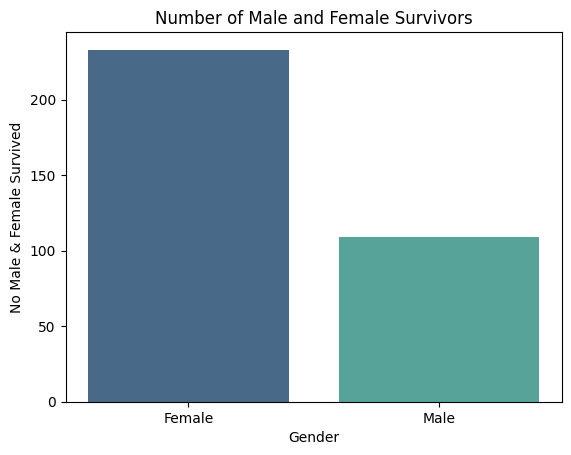

In [13]:
survived_bar_x = ['Female', 'Male']
survived_bar_y = [females_survived, male_survived]
pl.bar(survived_bar_x,survived_bar_y,color=['#496989','#58A399'])
pl.xlabel('Gender')
pl.ylabel('No Male & Female Survived')
pl.title('Number of Male and Female Survivors')

Text(0.5, 1.0, 'Histogram showing No people survived by their age group')

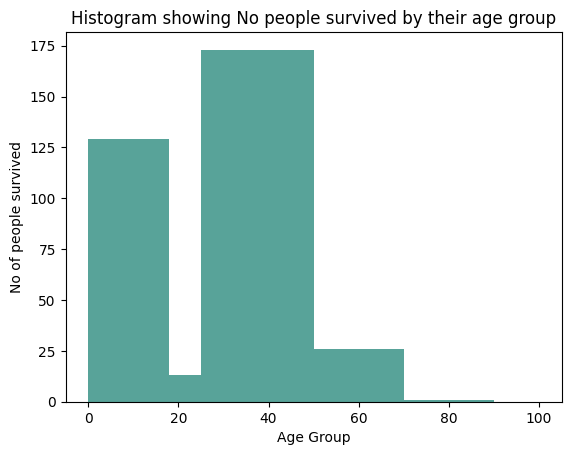

In [14]:
a=[0,18,25,50,70,90,100]
pl.hist(survived_data['Age'],bins=a,color='#58A399')
pl.xlabel('Age Group')
pl.ylabel('No of people survived')
pl.title('Histogram showing No people survived by their age group')

In [15]:
# as the above tale showing the number of peoples survived as per the age group
# Age group    #survived
# 0-18          129
# 18-25         13
# 25-50         173
# 50-70         26
# 70-90         1
# 90-100        0

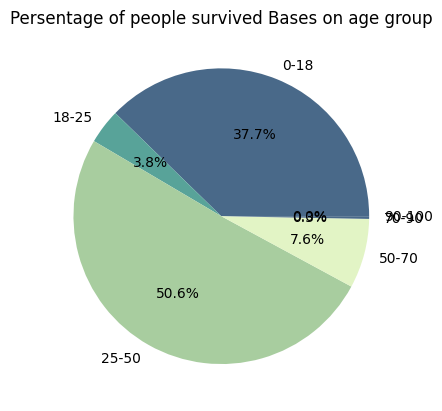

In [16]:
age_group=['0-18','18-25','25-50','50-70','70-90','90-100']
no_of_people=np.array([129,13,173,26,1,0])
pl.pie(no_of_people,labels = age_group,autopct='%1.1f%%',colors=colours)
pl.title('Persentage of people survived Bases on age group')
pl.show()

In [17]:
# this pie chart shows how many people of differnt age group survived in this disaster

In [18]:
# now we get the data about who most like to travels in S\C\Q classes accoring to their age group and gender
# for that we create two seprate gender wise table for males and for female the code is given below
Females_data = pd.DataFrame(columns=["Age","Sex",'Embarked'])
for i in range(0, 890): 
    if new_data["Sex"].iloc[i] == 'female':
        females_row = new_data.iloc[i][["Age", "Sex",'Embarked']]
        Females_data = pd.concat([Females_data, females_row.to_frame().T], ignore_index=True)
males_data = pd.DataFrame(columns=["Age","Sex",'Embarked'])
for i in range(0, 890): 
    if new_data["Sex"].iloc[i] == 'male':
        males_row = new_data.iloc[i][["Age", "Sex",'Embarked']]
        males_data = pd.concat([males_data, males_row.to_frame().T], ignore_index=True)


In [19]:
#now we do further analysis like which age group like to travel in which class
# how many males/females like to travel in S/C/Q class 
# for females:-
Female_s=[]
Female_c=[]
Female_q=[]
for i in range(0,len(Females_data)):
    if any(Females_data.iloc[i] == 'S'):
        Female_s.append(1)
    elif any(Females_data.iloc[i] == 'C'):
        Female_c.append(1)
    else:
        Female_q.append(1)
print("female")
print("Womens in S class :",sum(Female_s))
print("Womens in C class :",sum(Female_c))
print("Womens in Q class :",sum(Female_q))

male_s=[]
male_c=[]
male_q=[]
for i in range(0,len(males_data)):
    if any(males_data.iloc[i] == 'S'):
        male_s.append(1)
    elif any(males_data.iloc[i] == 'C'):
        male_c.append(1)
    else:
        male_q.append(1)
print("males:")
print("Mens in S class :",sum(male_s))
print("Mens in C class :",sum(male_c))
print("Mens in Q class :",sum(male_q))

# Total:-
total_s=sum(male_s)+sum(Female_s)
total_c=sum(male_c)+sum(Female_c)
total_q=sum(male_q)+sum(Female_q)
print("total males and female in S class:",total_s)
print("total males and female in C class:",total_c)
print("total males and female in Q class:",total_q)

female
Womens in S class : 203
Womens in C class : 73
Womens in Q class : 38
males:
Mens in S class : 441
Mens in C class : 95
Mens in Q class : 40
total males and female in S class: 644
total males and female in C class: 168
total males and female in Q class: 78


Text(0.5, 1.0, 'Number of Male and Female In Each Class')

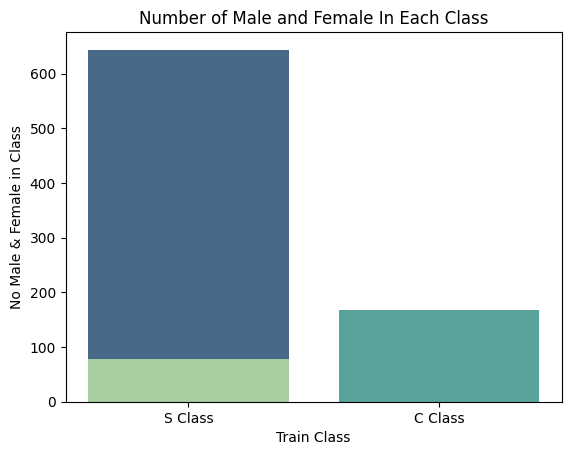

In [20]:
Class_bar_x = np.array(['S Class', 'C Class','S Class'])
Class_people_y =np.array([total_s,total_c,total_q])
pl.bar(Class_bar_x,Class_people_y,color=['#496989','#58A399','#A8CD9F'])
pl.xlabel('Train Class')
pl.ylabel('No Male & Female in Class')
pl.title('Number of Male and Female In Each Class')

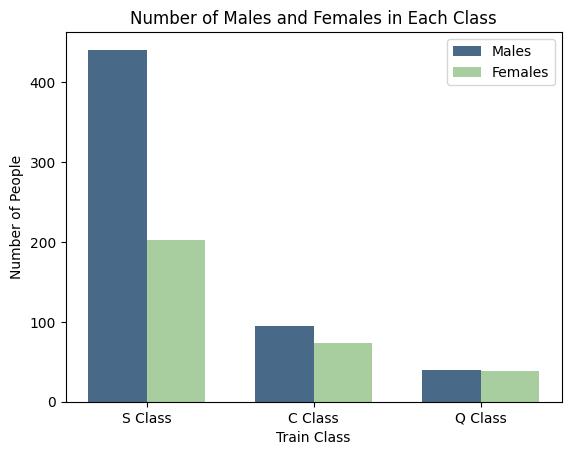

In [21]:
Class_bar_x = ['S Class', 'C Class', 'Q Class']
males = [441, 95, 40]  
females = [203, 73, 38] 

x = np.arange(len(Class_bar_x))  
width = 0.35 
# Creating the grouped bar chart
fig , ax = pl.subplots()
bar1 = ax.bar(x - width/2, males, width, label='Males', color='#496989')
bar2 = ax.bar(x + width/2, females, width, label='Females', color='#A8CD9F')
ax.set_xlabel('Train Class')
ax.set_ylabel('Number of People')
ax.set_title('Number of Males and Females in Each Class')
ax.set_xticks(x)
ax.set_xticklabels(Class_bar_x)
ax.legend()

In [22]:
# the above data shows
# 1. more people are like to travel throug the s class
# 2. less womens are like to travel  through train
# 3. all class has more males than women because the number of males are greater than the womens

# now we do last analysis thta is which age group of peoplw likes to travel through which class
# but before that we have to drop all the null vales from the table

In [32]:
#now to find which age group likes to travel through which classes we create three dataset namely sclass,cclass,qclass and find age group data from it
S_Class = pd.DataFrame(columns=["Age","Sex",'Embarked'])
for i in range(0,len(new_data)): 
    if new_data["Embarked"].iloc[i] == 'S':
        S_Class_rows = new_data.iloc[i][["Age", "Sex",'Embarked']]
        S_Class = pd.concat([S_Class, S_Class_rows.to_frame().T], ignore_index=True)
C_class = pd.DataFrame(columns=["Age","Sex",'Embarked'])
for i in range(0,len(new_data)): 
    if new_data["Embarked"].iloc[i] == 'C':
        C_class_rows = new_data.iloc[i][["Age", "Sex",'Embarked']]
        C_class = pd.concat([C_class, C_class_rows.to_frame().T], ignore_index=True)
Q_class = pd.DataFrame(columns=["Age","Sex",'Embarked'])
for i in range(0,len(new_data)): 
    if new_data["Embarked"].iloc[i] == 'Q':
        Q_class_rows = new_data.iloc[i][["Age", "Sex",'Embarked']]
        Q_class = pd.concat([Q_class, Q_class_rows.to_frame().T], ignore_index=True)
# exporting classes data frame in files
S_Class.to_csv('S_class.csv')
C_class.to_csv('C_class.csv')
Q_class.to_csv('Q_class.csv')

In [24]:
S_Class

,Age,Sex,Embarked
0,22.0,male,S
1,26.0,female,S
2,35.0,female,S
3,35.0,male,S
4,54.0,male,S
...,...,...,...
639,28.0,male,S
640,25.0,male,S
641,27.0,male,S
642,19.0,female,S


In [25]:
Q_class

,Age,Sex,Embarked
0,NaN,male,Q
1,2.0,male,Q
2,15.0,female,Q
3,NaN,female,Q
4,NaN,female,Q
...,...,...,...
72,NaN,male,Q
73,NaN,male,Q
74,NaN,male,Q
75,39.0,female,Q


In [26]:
C_class

,Age,Sex,Embarked
0,38.0,female,C
1,14.0,female,C
2,NaN,female,C
3,NaN,male,C
4,40.0,male,C
...,...,...,...
163,27.0,female,C
164,28.0,female,C
165,15.0,female,C
166,56.0,female,C


In [27]:
# as we see some null values in the above three data sets we first clear thwm all
S_Class.dropna(subset=['Age'],inplace=True)
C_class.dropna(subset=['Age'],inplace=True)
Q_class.dropna(subset=['Age'],inplace=True)

In [28]:
C_class

,Age,Sex,Embarked
0,38.0,female,C
1,14.0,female,C
4,40.0,male,C
6,28.0,male,C
8,14.0,female,C
...,...,...,...
163,27.0,female,C
164,28.0,female,C
165,15.0,female,C
166,56.0,female,C


In [29]:
# as all values are cleared we set forward for further analysis
# for that we simply create five list for each clas with different age group
C_0_18=0
C_19_30=0
C_31_45=0
C_46_60=0
C_61_100=0
Q_0_18=0
Q_19_30=0
Q_31_45=0
Q_46_60=0
Q_61_100=0
S_0_18 = 0
S_19_30 = 0
S_31_45 = 0
S_46_60 = 0
S_61_100 = 0
for i in range(0, len(S_Class)):
    S_age = S_Class['Age'].iloc[i]
    if S_age <= 18:
        S_0_18 += 1
    elif 18 < S_age <= 30:
        S_19_30 += 1
    elif 30 < S_age <= 45:
        S_31_45 += 1
    elif 45 < S_age <= 60:
        S_46_60 += 1
    else:
        S_61_100 += 1
for i in range(0, len(C_class)):
    C_age = C_class['Age'].iloc[i]
    if C_age <= 18:
        C_0_18 += 1
    elif 18 < C_age <= 30:
        C_19_30 += 1
    elif 30 < C_age <= 45:
        C_31_45 += 1
    elif 45 < C_age <= 60:
        C_46_60 += 1
    else:
        C_61_100 += 1
for i in range(0, len(Q_class)):
    Q_age = Q_class['Age'].iloc[i]
    if Q_age <= 18:
        Q_0_18 += 1
    elif 18 < Q_age <= 30:
        Q_19_30 += 1
    elif 30 < Q_age <= 45:
        Q_31_45 += 1
    elif 45 < Q_age <= 60:
        Q_46_60 += 1
    else:
        Q_61_100 += 1
print("Count of passengers aged 0-18 in S class:", S_0_18)
print("Count of passengers aged 19-30 in S class:",S_19_30)
print("Count of passengers aged 31-45 in S class:",S_31_45)
print("Count of passengers aged 46-60 in S class:",S_46_60)
print("Count of passengers aged 61-100 in S class:",S_61_100)
print("Count of passengers aged 0-18 in  C class:", C_0_18)
print("Count of passengers aged 19-30 in C class:",C_19_30)
print("Count of passengers aged 31-45 in C class:",C_31_45)
print("Count of passengers aged 46-60 in C class:",C_46_60)
print("Count of passengers aged 61-100 in C class:",C_61_100)
print("Count of passengers aged 0-18 in Q class:", Q_0_18)
print("Count of passengers aged 19-30 in Q class:",Q_19_30)
print("Count of passengers aged 31-45 in Q class:",Q_31_45)
print("Count of passengers aged 46-60 in Q class:",Q_46_60)
print("Count of passengers aged 61-100 in Q class:",Q_61_100)




Count of passengers aged 0-18 in S class: 103
Count of passengers aged 19-30 in S class: 216
Count of passengers aged 31-45 in S class: 162
Count of passengers aged 46-60 in S class: 57
Count of passengers aged 61-100 in S class: 16
Count of passengers aged 0-18 in  C class: 28
Count of passengers aged 19-30 in C class: 46
Count of passengers aged 31-45 in C class: 30
Count of passengers aged 46-60 in C class: 23
Count of passengers aged 61-100 in C class: 3
Count of passengers aged 0-18 in Q class: 8
Count of passengers aged 19-30 in Q class: 8
Count of passengers aged 31-45 in Q class: 9
Count of passengers aged 46-60 in Q class: 1
Count of passengers aged 61-100 in Q class: 2


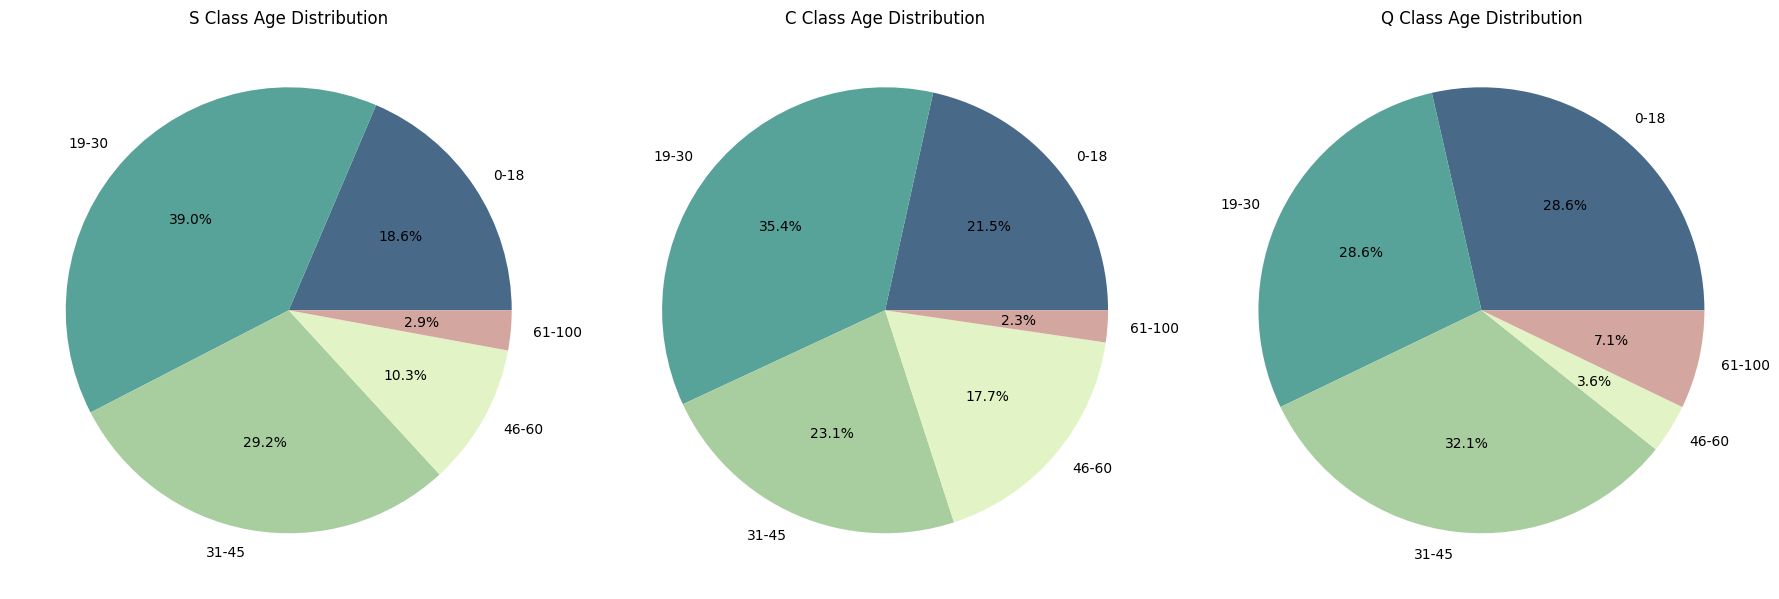

In [30]:
import matplotlib.pyplot as plt

# Age groups and counts for each class
age_groups = ['0-18', '19-30', '31-45', '46-60', '61-100']

S_counts = [103, 216, 162, 57, 16]
C_counts = [28, 46, 30, 23, 3]
Q_counts = [8, 8, 9, 1, 2]

# Custom colors
colors = ['#496989', '#58A399', '#A8CD9F', '#E2F4C5', '#D3A6A0']

# Create subplots for pie charts
fig, axes = pl.subplots(1, 3, figsize=(18, 6))

# S Class Pie Chart
axes[0].pie(S_counts, labels=age_groups, autopct='%1.1f%%', colors=colors)
axes[0].set_title('S Class Age Distribution')

# C Class Pie Chart
axes[1].pie(C_counts, labels=age_groups, autopct='%1.1f%%', colors=colors)
axes[1].set_title('C Class Age Distribution')

# Q Class Pie Chart
axes[2].pie(Q_counts, labels=age_groups, autopct='%1.1f%%', colors=colors)
axes[2].set_title('Q Class Age Distribution')

# Display the plot
pl.tight_layout()
pl.show()
